# 模式识别第一次编程作业 简单的感知机模型训练

## 黄志鹏 PB16150288

### 实验分析总结
###### 本次实验是一个小的感知机实现, 通过这次代码实现, 我对感知机算法, 和这种梯度下降的模型自学习思想理解更深了
###### 下面是具体的代码和实验结果:

In [1]:
# 模式识别第一次编程作业 简单的感知机模型训练
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

In [2]:
# 输入初始化数据
print("=" * 64)
print("开始初始化数据:")
data1 = [[0, 0], [0, 1]]
data2 = [[1, 0], [1, 1]]
print("初始化输入的w1 类的数据有:")
print(data1)
print("初始化输入的w2 类的数据有:")
print(data1)
data1 = np.array(data1)
data2 = np.array(data2)
step = 0  # 迭代步数
c = 1  # 固定比例因子为1
Nc = 0  # 正确分类计数器
w = [1, 1]
print("初始化的权向量为:")
print(w)
w = np.array(w)

开始初始化数据:
初始化输入的w1 类的数据有:
[[0, 0], [0, 1]]
初始化输入的w2 类的数据有:
[[0, 0], [0, 1]]
初始化的权向量为:
[1, 1]


In [3]:
# 对数据和权向量进行增广
print("=" * 64)
print("对权向量和数据进行增广处理")

w = np.pad(w, (0, 1), 'constant', constant_values=1)
print("w:")
print(w)

data1 = np.pad(data1, ((0, 0), (0, 1)), 'constant', constant_values=1)
print("data1:")
print(data1)

data2 = np.pad(data2, ((0, 0), (0, 1)), 'constant', constant_values=1)
print("data2:")
print(data2)

对权向量和数据进行增广处理
w:
[1 1 1]
data1:
[[0 0 1]
 [0 1 1]]
data2:
[[1 0 1]
 [1 1 1]]


In [4]:
# 归一化处理数据
print("=" * 64)
print("归一化处理数据:")
print("data = append(data1, data2* -1)")
data = np.append(data1, -1*data2, axis=0)
print("data:")
print(data)

归一化处理数据:
data = append(data1, data2* -1)
data:
[[ 0  0  1]
 [ 0  1  1]
 [-1  0 -1]
 [-1 -1 -1]]


In [5]:
# 感知机算法迭代
print("=" * 64)
print("开始算法迭代:")
s = "|| {:^8} || {:^8} || {:^16} ||"
w_sum = []
print(s.format("step", "result", "w"))
while Nc < 4:
    point = step % 4
    test = data[point]
    result = test.dot(w.transpose())
    if result <= 0:
        w += test*c
        Nc = 1 # 对Nc进行刷新
    else:
        Nc += 1
    step += 1
    print(s.format(step, result, np.array2string(w)))
    w_sum.append(w.copy())


开始算法迭代:
||   step   ||  result  ||        w         ||
||    1     ||    1     ||     [1 1 1]      ||
||    2     ||    2     ||     [1 1 1]      ||
||    3     ||    -2    ||     [0 1 0]      ||
||    4     ||    -1    ||    [-1  0 -1]    ||
||    5     ||    -1    ||    [-1  0  0]    ||
||    6     ||    0     ||    [-1  1  1]    ||
||    7     ||    0     ||    [-2  1  0]    ||
||    8     ||    1     ||    [-2  1  0]    ||
||    9     ||    0     ||    [-2  1  1]    ||
||    10    ||    2     ||    [-2  1  1]    ||
||    11    ||    1     ||    [-2  1  1]    ||
||    12    ||    0     ||    [-3  0  0]    ||
||    13    ||    0     ||    [-3  0  1]    ||
||    14    ||    1     ||    [-3  0  1]    ||
||    15    ||    2     ||    [-3  0  1]    ||
||    16    ||    2     ||    [-3  0  1]    ||


1
[1 1 1]


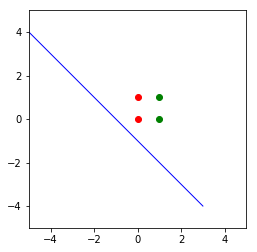

2
[1 1 1]


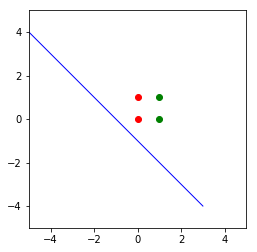

3
[0 1 0]


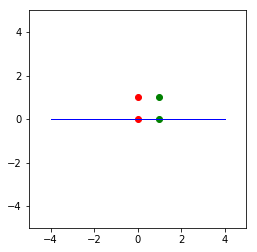

4
[-1  0 -1]


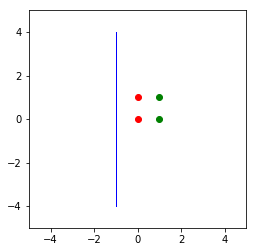

5
[-1  0  0]


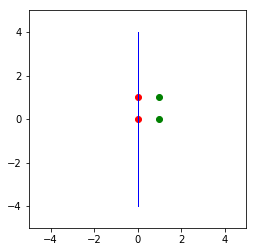

6
[-1  1  1]


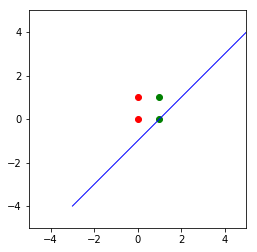

7
[-2  1  0]


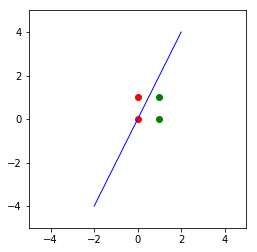

8
[-2  1  0]


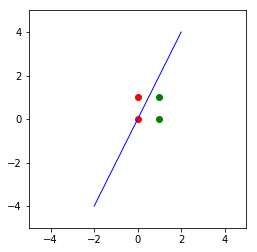

9
[-2  1  1]


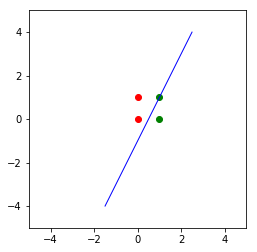

10
[-2  1  1]


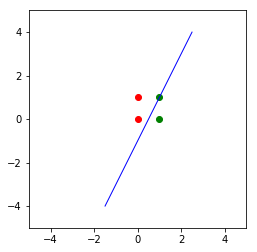

11
[-2  1  1]


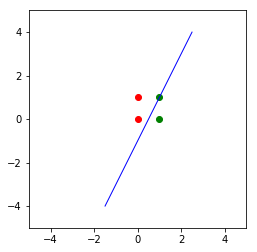

12
[-3  0  0]


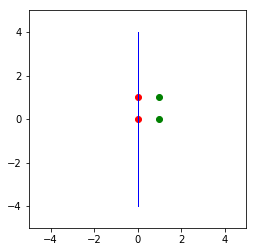

13
[-3  0  1]


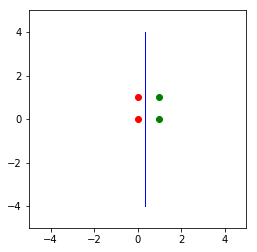

14
[-3  0  1]


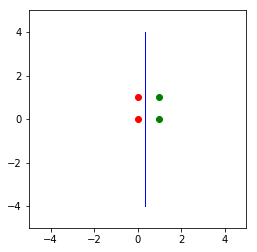

15
[-3  0  1]


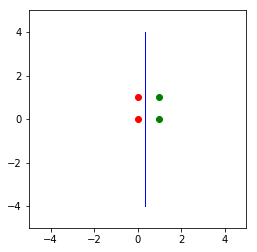

16
[-3  0  1]


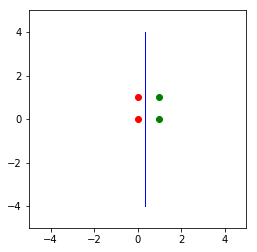

In [6]:
# 可视化结果
print("=" * 64)
for i in range(len(w_sum)):
    w = w_sum[i]
    print(i + 1)
    print(w)
    figure, ax = plt.subplots()
    ax.set_aspect("equal")
    ax.scatter(data[0][0], data[0][1], c='r')  # 绘制数据点
    ax.scatter(data[1][0], data[1][1], c='r')
    ax.scatter(-data[2][0], -data[2][1], c='g')
    ax.scatter(-data[3][0], -data[3][1], c='g')
    u = w[0]
    v = w[1]
    z = w[2]
    # 方程是 ux + vy + z = 0, 即 y = -u/v * x - z/v, x = -v/u * y - z/u
    # 下面绘制直线
    if(u != 0):
        point1 = [-v/u * (-4) - z/u, -4]
        point2 = [-v/u * 4- z/u, 4]
    elif(v != 0):
        point1 = [-4, -u/v * (-4) - z/v]
        point2 = [4, -u/v * 4 - z/v]
    else:
        point1 = [0, z]
        point2 = [0, z]
    points = (point1, point2)
    (line1_xs, line1_ys) = zip(*points)
    ax.add_line(Line2D(line1_xs, line1_ys, linewidth=1, color='blue'))
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    plt.show()